In [13]:
pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 5.8 MB/s eta 0:00:00


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ash2703/handsignimages")

print("Path to dataset files:", path)

100%|██████████| 23.1M/23.1M [00:00<00:00, 99.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2


1
A


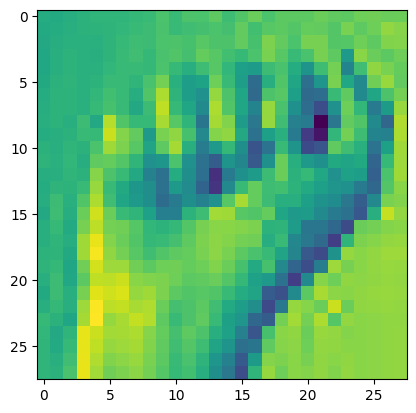

In [2]:
import os
import matplotlib.pyplot as plt
alphabet_array = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
path = "/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Train"
image_arr = []
image_name_file = []
image_name_value = []

for lettre in alphabet_array:

    path_lettre = os.path.join(path, lettre)
    os.listdir(path_lettre)
    counte_lettre = 0
    for image_name in os.listdir(path_lettre):
      image = plt.imread(os.path.join(path_lettre,image_name))
      image_name_file.append(image_name)
      image_name_value.append(lettre)
      # image = image.flatten()
      image_arr.append(image)
      counte_lettre += 1
      if counte_lettre == 950:
        break

print(image_name[0])
print(image_name_value[0])
plt.imshow(image_arr[0])

In [3]:
path = "/root/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2/Test"


for lettre in alphabet_array:

    path_lettre = os.path.join(path, lettre)
    os.listdir(path_lettre)
    for image_name in os.listdir(path_lettre):
      image = plt.imread(os.path.join(path_lettre,image_name))
      image_name_file.append(image_name)
      image_name_value.append(lettre)
      # image = image.flatten()
      image_arr.append(image)

In [4]:
import numpy as np

X_data = np.array(image_arr)
y_data = np.array(image_name_value)

X_data = x = np.expand_dims(X_data, axis=-1)






In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,         # Random rotation
    width_shift_range=0.1,     # Horizontal shift
    height_shift_range=0.1,    # Vertical shift
    zoom_range=0.1,            # Random zoom
    horizontal_flip=True,     # No horizontal flip for digits/letters
    fill_mode='nearest'        # Fill empty pixels
)

# Augment the dataset
augmented_images = []
augmented_targets = []
augmentation_factor = 5  # Number of augmented images per original image

for img, target in zip(X_data, y_data):
    img = img.reshape((1,) + img.shape)  # Add batch dimension for ImageDataGenerator
    count = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_targets.append(target)
        count += 1
        if count >= augmentation_factor:
            break

# Convert augmented data to arrays
augmented_images = np.array(augmented_images)
augmented_targets = np.array(augmented_targets)

print("Shape of augmented images:", augmented_images.shape)
print("Shape of augmented targets:", augmented_targets.shape)

# Combine original and augmented data
X_data = np.concatenate((X_data, augmented_images), axis=0)
y_data = np.concatenate((y_data, augmented_targets), axis=0)


Shape of augmented images: (149860, 28, 28, 1)
Shape of augmented targets: (149860,)


In [6]:
flatten_data = []
for x in X_data:
  flatten_data.append(x.flatten())
X_data_flatten = np.array(flatten_data)
X_data_normalise = X_data_flatten / 255

In [7]:
X_data_normalise.shape

(179832, 784)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_normalise, y_data, test_size=0.2, random_state=42)

In [9]:
X_train[0].shape

(784,)

In [11]:
!pip install dagshub
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.2/252.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85

In [14]:
import dagshub
import mlflow
from sklearnex import patch_sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Initialize DagsHub with MLflow
dagshub.init(repo_owner='ayoub.boudra1', repo_name='deep-learning-model', mlflow=True)

# Patch scikit-learn to use Intel optimizations
patch_sklearn()

# Generate a synthetic dataset (replace with your dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start MLflow tracking
with mlflow.start_run():
    # Log parameters
    mlflow.log_param('kernel', 'rbf')
    mlflow.log_param('C', 10)
    mlflow.log_param('gamma', 'scale')
    mlflow.log_param('degree', 2)

    # Create and train the SVM model
    model = SVC(kernel='rbf', C=10, gamma='scale', degree=2)
    model.fit(X_train, y_train)

    # Log the model
    mlflow.sklearn.log_model(model, "svm_model")

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Log metrics
    mlflow.log_metric('accuracy', accuracy)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=07be1dd7-03e9-4ec1-9bfa-f72befeb0d5b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=6357c089e92a07834cb37d70360fe995acba12bfe1035ac04de0c8d9e4f1ef80




Accessing as ayoub.boudra1

Initialized MLflow to track repo "ayoub.boudra1/deep-learning-model"

Repository ayoub.boudra1/deep-learning-model initialized!

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
2024/12/07 23:05:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.85
🏃 View run glamorous-fowl-746 at: https://dagshub.com/ayoub.boudra1/deep-learning-model.mlflow/#/experiments/0/runs/e786d7aa463a4b5d9039403a5c5823f5
🧪 View experiment at: https://dagshub.com/ayoub.boudra1/deep-learning-model.mlflow/#/experiments/0


In [ ]:
from joblib import dump

# Save the model
dump(model, "svm_model.joblib")
print("Model saved as svm_model.joblib")

Model saved as svm_model.joblib


In [ ]:
X_train.shape

(23977, 784)

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Définir les hyperparamètres à optimiser
param_grid = {
    'C': [0.1, 1, 10, 100],          # Régularisation
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Paramètre gamma
    'kernel': ['rbf', 'poly', 'sigmoid']           # Type de kernel
}

# Initialiser le modèle SVM
svc = SVC()

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Lancer la recherche
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres trouvés :", grid_search.best_params_)

# Évaluer le modèle optimisé sur le jeu de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test : {accuracy:.2f}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 